## The Stiffened Panel

If we follow the example from p. 179, we have the following parameters for a stiffened panel

In [1]:
import numpy as np

p = 0.833 #in., rivet pitch
b = 10.0 #in., stiffener spacing
t = 0.063 #in., skin thickness
A_st = 0.27 #in^2, stiffener cross-sectional area
A_sk = b*t #in^2, skin cross-sectional area (per stiffener)
Kc = 68.0 #ksi sqrt(in), fracture toughness of skin
s_ys = 65.0 #ksi, tensile yield strength of stiffener
tau_ys = 50.0 #ksi, shear yield strength of rivet
A_r = np.pi*(5./16.)**2/4. #in^2, cross-sectional area of rivet
mu = A_st/(A_st + A_sk) #parameter for charts, note that E_st = E_sk, so they cancel
print mu
print p/b #ratio for chart

0.3
0.0833


We now use the charts where $\mu = 0.3$ to find $\beta$, $L$ and $L_R$ as a function of $a/b$

NOTE: I copied these values by hand, but you can also extract them from the charts at http://nbviewer.jupyter.org/github/ndaman/damagetolerance/blob/master/Stiffener%20Figures.ipynb
Click "Edit Chart" on the graph whose data you want to extract, and you'll be taken to a page that has tables of the x,y data used to produce the chart. Copy those values corresponding to the p/b ratio you desire and you'll have an array of beta, L, and L_R values for use in a problem.

In [8]:
ab = np.array([0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.575,0.6,0.65,0.7,0.8,0.9,1.0])
beta = np.array([.995,.98,.94,.87,.79,.6,.43,.41,.41,.43,.45,.49,.52,.54])
ab_L = np.linspace(0.1,1.0,10)
L = np.array([1,1.05,1.125,1.25,1.6,1.8,2.0,2.15,2.25,2.4])
L_R = np.array([0,0,0,0,0.08,0.16,0.19,0.21,0.23,0.24])

We can now use these values to plot the residual strength of the stiffened skin. The residual strength will be the minimum value of 10.2, 10.3f, and 10.4c

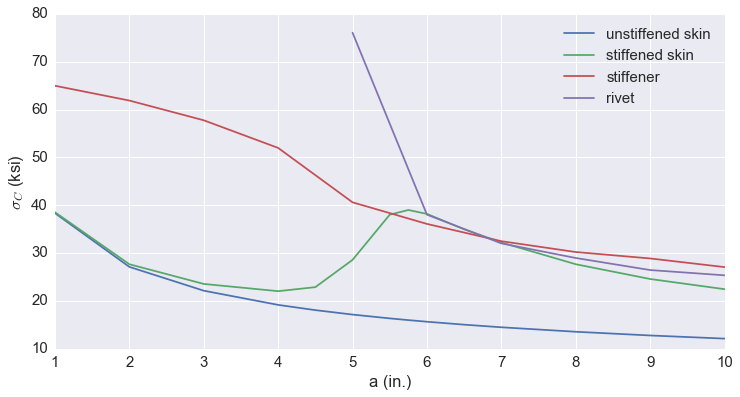

In [13]:
#load plotting libraries
from matplotlib import pyplot as plt
#optional, for prettier default color scheme
import seaborn as sb
#make fonts bigger
sb.set(font_scale=1.5)
#only needed for "live notebooks" such as this demo
%matplotlib inline

a = ab*b
a_L = ab_L*b
#residual strength
sc_skin = Kc/np.sqrt(np.pi*a) #no stiffener
sc_st_skin = Kc/(np.sqrt(np.pi*a)*beta) #stiffened skin
sc_stiffener = s_ys/L #stiffener
sc_rivet = tau_ys*A_r/(b*t*L_R)

plt.figure(figsize=(12,6))
plt.plot(a,sc_skin,label='unstiffened skin')
plt.plot(a,sc_st_skin,label='stiffened skin')
plt.plot(a_L,sc_stiffener,label='stiffener')
plt.plot(a_L,sc_rivet,label='rivet')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_C$ (ksi)')

We can see that the stiffener has the strongest effect when the crack nears the stiffener (at $a=5$). Notice that the residual strength for a crack length of 10 inches is almost the same as for a 5 inch crack.

## Severed stiffeners

In this example we use Case 10 results from p. 195

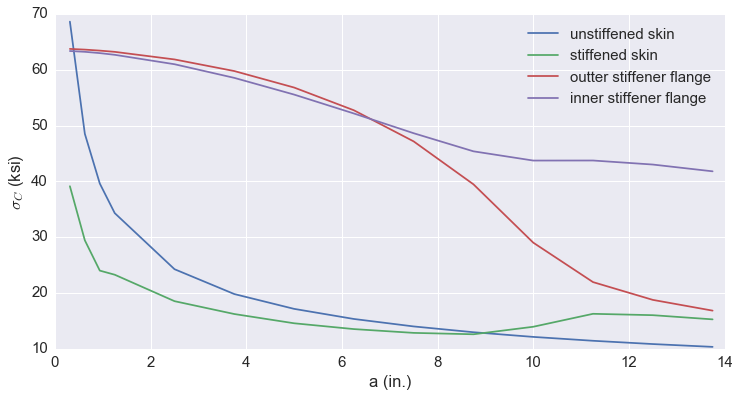

In [18]:
a = np.array([0.3125,.6250,.9375,1.25,2.5,3.75,5.0,6.25,7.5,8.75,10.0,11.25,12.5,13.75])
beta = np.array([1.7537,1.6484,1.65,1.4743,1.3091,1.2205,1.1772,1.134,1.090,1.0291,0.8697,.703,.6771,.6773])
scfo = np.array([1.0197,1.0217,1.0246,1.0282,1.0508,1.0874,1.1439,1.2323,1.378,1.6465,2.2394,2.9609,3.4634,3.8597])
scfi = np.array([1.0258,1.0281,1.0319,1.0369,1.0656,1.1101,1.1699,1.2459,1.3365,1.4320,1.4862,1.4859,1.5109,1.5548])

sc_skin = Kc/np.sqrt(np.pi*a) #no stiffener
sc_st_skin = Kc/(np.sqrt(np.pi*a)*beta) #stiffened skin
sc_out = s_ys/scfo #outter flange of stiffener
sc_in = s_ys/scfi #inner flange of stiffener

plt.figure(figsize=(12,6))
plt.plot(a,sc_skin,label='unstiffened skin')
plt.plot(a,sc_st_skin,label='stiffened skin')
plt.plot(a,sc_out,label='outter stiffener flange')
plt.plot(a,sc_in,label='inner stiffener flange')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_C$ (ksi)')

## Crack Stoppers

To see the effect of crack stopper straps, we will compare the residual strength from Case 1, Case 3, and Case 5 from Swift's parametric study (203-207)

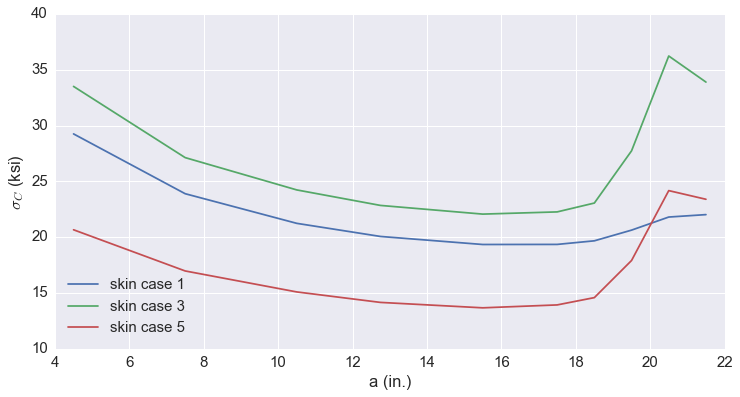

In [27]:
#crack stopper data entered in text file
data = np.loadtxt('crack_stopper.txt')
a = data[0,:] #crack length
beta_1 = 1.0/data[1,:] #beta for case 1
beta_3 = 1.0/data[2,:] #beta for case 3
beta_5 = 1.0/data[3,:] #beta for case 5
s_ccs_3 = data[4,:] #center crack stopper concentration factor, case 3 only
s_ocs_3 = data[5,:] #outter crack stopper concentration factor, case 3
s_ocs_5 = data[6,:] #outter crack stopper concentration factor, case 5
s_occf_1 = data[7,:] #center stiffener concentration factor, outside, case 1
s_occf_3 = data[8,:] #center stiffener concentration factor, outside, case 3
s_iccf_1 = data[7,:] #center stiffener concentration factor, inside, case 1
s_iccf_3 = data[8,:] #center stiffener concentration factor, inside, case 3
s_ocof_1 = data[9,:] #outter stiffener concentration factor, outside, case 1
s_ocof_3 = data[10,:] #outter stiffener concentration factor, outside, case 3
s_ocof_5 = data[11,:] #outter stiffener concentration factor, outside, case 5
s_icof_1 = data[12,:] #outter stiffener concentration factor, inside, case 1
s_icof_3 = data[13,:] #outter stiffener concentration factor, inside, case 3
s_icof_5 = data[14,:] #outter stiffener concentration factor, inside, case 5

#material properties
Kc = 100.0 #ksi sqrt(in) for skin
s_u_stoppers = 130.0 #ksi, utlimate strength of crack stoppers
s_u_frame = 80.0 #ksi, ultimate strength of stiffeners

#skin residual strength
sc_skin_1 = Kc/(np.sqrt(np.pi*a)*beta_1)
sc_skin_3 = Kc/(np.sqrt(np.pi*a)*beta_3)
sc_skin_5 = Kc/(np.sqrt(np.pi*a)*beta_5)

#center crack stopper
sc_ccs = s_u_stoppers/s_ccs_3

#outter crack stoppers
sc_ocs_3= s_u_stoppers/s_ocs_3
sc_ocs_5= s_u_stoppers/s_ocs_5

#center stiffener, outside flange
sc_occf_1 = s_u_frame/s_occf_1
sc_occf_3= s_u_frame/s_occf_3

#center stiffener, inside flange
sc_iccf_1 = s_u_frame/s_iccf_1
sc_iccf_3= s_u_frame/s_iccf_3

#outter stiffener, outside flange
sc_ocof_1 = s_u_frame/s_ocof_1
sc_ocof_3= s_u_frame/s_ocof_3
sc_ocof_5= s_u_frame/s_ocof_5

#outter stiffener, inside flange
sc_icof_1 = s_u_frame/s_icof_1
sc_icof_3= s_u_frame/s_icof_3
sc_icof_5= s_u_frame/s_icof_5

#plot skin residual strength
plt.figure(figsize=(12,6))
plt.plot(a,sc_skin_1,label='skin case 1')
plt.plot(a,sc_skin_3,label='skin case 3')
plt.plot(a,sc_skin_5,label='skin case 5')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_C$ (ksi)')